In [1]:
using Flux
using MLDatasets
using Images
using BSON: @load
using LinearAlgebra

In [2]:
include("./CompressedSensing.jl")
include("./vaemodel.jl")

vaeloss (generic function with 1 method)

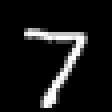

In [3]:
imgToRecover = MNIST(Float32, :test).features[:,:,1]
colorview(Gray, imgToRecover)'

In [4]:
@load "./savedmodels/vae100epoch" model

In [5]:
imgToRecover = reshape(imgToRecover, :)

784-element Vector{Float32}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [18]:
recovered = reshape(model(imgToRecover), 28, 28)

28×28 Matrix{Float64}:
 0.0  0.0          0.0          0.0          …  0.0          0.0
 0.0  0.0          0.0          0.0             0.0          0.0
 0.0  0.0          0.0          0.0             0.0          0.0
 0.0  0.0          0.0          0.0             0.0          0.0
 0.0  0.0          0.0          0.0             0.0          0.0
 0.0  0.0          0.0          0.0          …  1.47819e-5   0.0
 0.0  0.0          0.0          3.2867e-5       7.8475e-5    0.0
 0.0  0.0          0.0          0.000139101     0.000486069  0.0
 0.0  0.0          0.000209245  0.000246103     0.00253281   0.0
 0.0  0.0          5.80004e-5   0.000683976     0.00394911   3.03959e-5
 0.0  6.84587e-6   0.00018986   0.00282536   …  0.00779562   4.11637e-5
 0.0  4.03072e-6   0.000341488  0.0050294       0.0211141    6.3719e-5
 0.0  0.0          0.000820148  0.00549624      0.00964035   0.000155784
 ⋮                                           ⋱               
 0.0  4.6152e-5    0.00385958   0.00775787

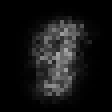

In [19]:
colorview(Gray, recovered)'

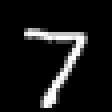

In [22]:
Gray.(reshape(imgToRecover, 28,28))'

In [9]:
F = samplefourierwithoutreplacement(128, 28^2)

110×784 Matrix{Float64}:
 0.0953463   0.134827  0.134787    0.134721    …  -0.00378176  -0.00189106
 0.0953463   0.134818  0.134752    0.134643        0.00486184   0.00243132
 0.0953463   0.134671  0.134164    0.13332         0.0134855    0.0067512
 0.0953463   0.134137  0.132034    0.128554       -0.027365    -0.0137542
 0.0953463   0.13332   0.128796    0.121369       -0.0399168   -0.0201859
 0.0953463   0.131152  0.12029     0.102848    …   0.060927     0.0313201
 0.0953463   0.130633  0.118276    0.0985379       0.0647512    0.0334182
 0.0953463   0.130081  0.116139    0.0939997       0.0685089    0.0355077
 0.0953463   0.129938  0.115587    0.0928308      -0.0694374   -0.0360286
 0.0953463   0.129645  0.114459    0.0904529      -0.0712811   -0.0370688
 0.0953463   0.129034  0.112115    0.0855416   …  -0.0749131   -0.039142
 0.0953463   0.128716  0.1109      0.083011       -0.0767004   -0.0401748
 0.0953463   0.128224  0.109024    0.0791258       0.0793443    0.0417192
 ⋮          

In [10]:
meas = F* imgToRecover

110-element Vector{Float64}:
 -4.001722130898035
  0.6340190239162568
  1.6362348995603861
  0.27647451186827177
 -1.098721786866325
 -1.9079400065807206
 -0.8419686518177388
  0.5234587800366206
 -0.7426842820642959
 -0.28842933526258313
 -0.46687405925038733
 -0.11739896405163955
  0.09271944953729332
  ⋮
  0.09369005885877885
 -0.16537802916786695
  0.08604746328586586
  0.10856568962585704
  0.04331645604648109
  0.009515175845075094
 -0.043311618034918765
  0.08843071523408247
 -0.08432285439540642
 -0.015722986860213766
  0.09518227408505216
 -0.04428714225064731

In [54]:
include("CompressedSensing.jl")

fullfourier (generic function with 1 method)

In [11]:
recovery = recoversignal(meas,F,model.decoder, 20, initcode = code, tblogdir="./logs/", out_toggle = 100)

LoadError: MethodError: no method matching (::Dense{typeof(relu), Matrix{Float64}, Bool})(::Tuple{Vector{Float64}, Vector{Float32}, Vector{Float32}})
[0mClosest candidates are:
[0m  (::Dense)([91m::AbstractVecOrMat[39m) at ~/.julia/packages/Flux/js6mP/src/layers/basic.jl:157
[0m  (::Dense)([91m::AbstractArray[39m) at ~/.julia/packages/Flux/js6mP/src/layers/basic.jl:162

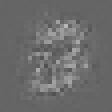

In [38]:
colorview(Gray, reshape(recovery, 28,28)')

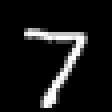

In [40]:
colorview(Gray, reshape(imgToRecover, 28, 28)')

In [41]:
recovery[1]

0.39564957199924244

In [42]:
function show(sig)
    plot(colorview(Gray, reshape(sig, 28,28)'))
end

show (generic function with 1 method)

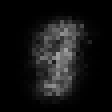

In [45]:
show(model(imgToRecover))

In [ ]:
otherimg = MNIST(Float32,)

In [6]:
code = model.encoder(imgToRecover)

([-11210.868321725422, 8522.5732421875, 10523.913540969554, -7776.256120685855, -8522.845703125, 33278.82455128401, 8522.908203125, 14778.850594101059, 13655.986449304908, 16148.514858294413, -8522.998046875, -12786.163671479067, 19763.665201900876, -8421.28263700543, 8522.9892578125, -8523.0478515625, -8433.552269612852, -8523.0341796875, -100493.39023985408, 12232.854870597257], Float32[-8522.888, 8522.573, 8523.582, -8523.898, -8522.846, 8523.4, 8522.908, 8523.4795, 8523.118, 8522.922, -8522.998, -8523.388, -8523.293, -8523.1, 8522.989, -8523.048, -8523.392, -8523.034, 8522.96, 8523.209], Float32[17.270842, -8338.5205, 17.354424, 17.318869, -8339.521, 18.911951, -8341.248, 17.934109, 17.740982, 17.068094, -8342.433, 17.544617, 18.462055, 16.592808, -8338.626, -8342.703, 19.175608, -8340.292, 22.263325, 17.163574])

In [48]:
norm(code)

76193.57915283654